# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +  city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f'{city_url}').json()        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | raja
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | pereslavl'-zalesskiy
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | pendleton
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | minas de marcona
Processing Record 14 of Set 1 | shahpura
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | biloela
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | peniche
Processing Record 21 of Set 1 | kitimat
Processing Record 22 of Set 1 |

In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64


In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,raja,8.4596,25.6780,293.69,93,100,1.36,SS,1690415944
1,east london,-33.0153,27.9116,291.21,66,76,5.96,ZA,1690415945
2,yellowknife,62.4560,-114.3525,298.44,31,75,5.66,CA,1690415757
3,pereslavl'-zalesskiy,56.7393,38.8563,288.28,98,68,3.96,RU,1690415946
4,grytviken,-54.2811,-36.5092,273.60,98,100,5.00,GS,1690415946


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,raja,8.4596,25.6780,293.69,93,100,1.36,SS,1690415944
1,east london,-33.0153,27.9116,291.21,66,76,5.96,ZA,1690415945
2,yellowknife,62.4560,-114.3525,298.44,31,75,5.66,CA,1690415757
3,pereslavl'-zalesskiy,56.7393,38.8563,288.28,98,68,3.96,RU,1690415946
4,grytviken,-54.2811,-36.5092,273.60,98,100,5.00,GS,1690415946


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

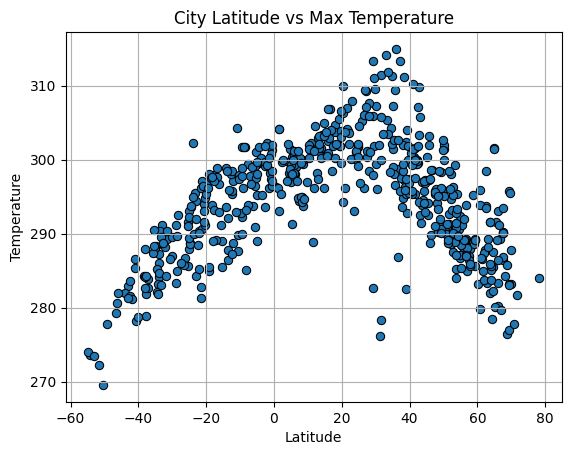

In [77]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)


# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

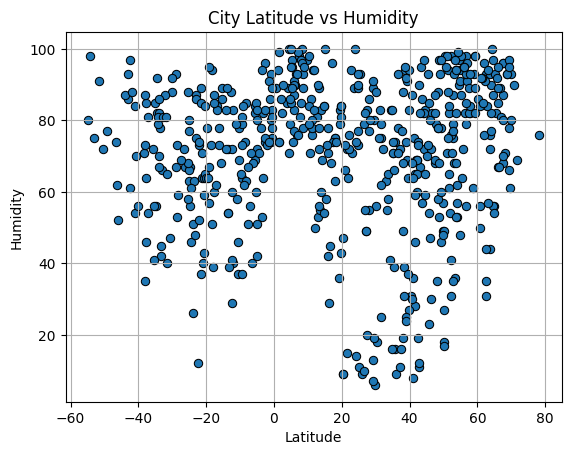

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

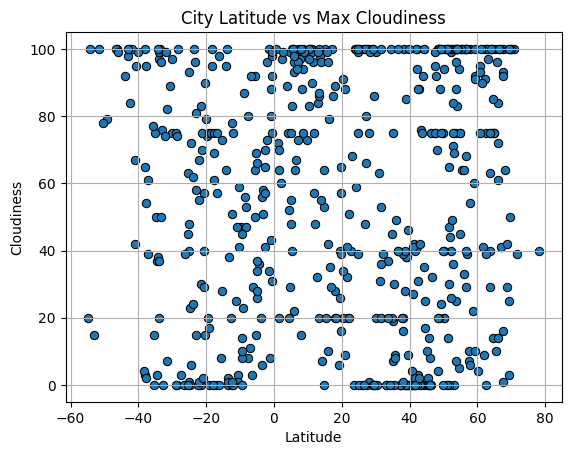

In [79]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

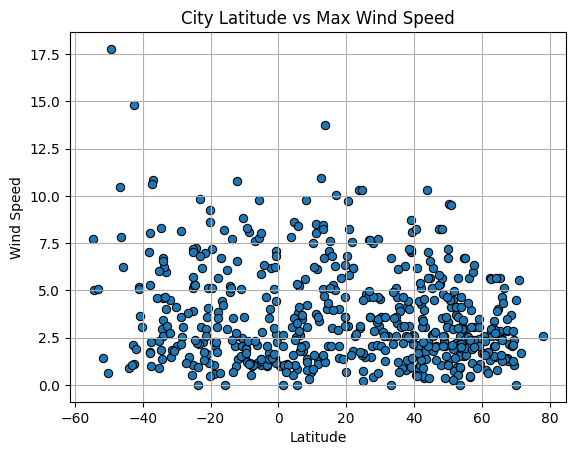

In [80]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def lin_reg(data, x_data, y_data):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept


In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,raja,8.4596,25.6780,293.69,93,100,1.36,SS,1690415944
2,yellowknife,62.4560,-114.3525,298.44,31,75,5.66,CA,1690415757
3,pereslavl'-zalesskiy,56.7393,38.8563,288.28,98,68,3.96,RU,1690415946
5,tazovsky,67.4667,78.7000,290.06,87,16,1.44,RU,1690415947
9,klyuchi,52.2667,79.1667,294.68,41,99,2.24,RU,1690415948


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east london,-33.0153,27.9116,291.21,66,76,5.96,ZA,1690415945
4,grytviken,-54.2811,-36.5092,273.60,98,100,5.00,GS,1690415946
6,ushuaia,-54.8000,-68.3000,273.96,80,20,7.72,AR,1690415947
7,margaret river,-33.9500,115.0667,286.06,70,97,6.72,AU,1690415948
8,port-aux-francais,-49.3500,70.2167,277.75,77,79,17.78,TF,1690415948


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6136145212463234


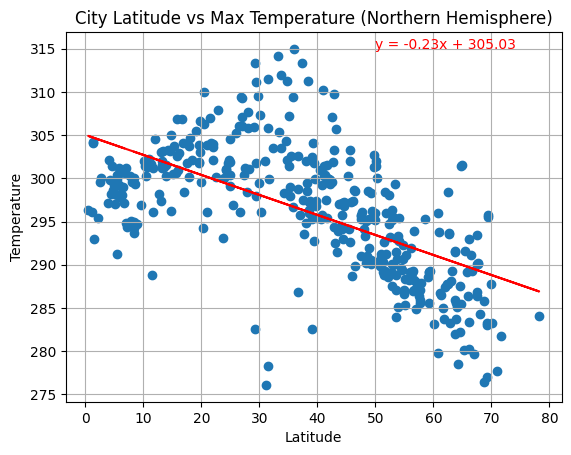

In [84]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50, 315), color = "red")

plt.plot(x_data, regress_values, color = "red")


The r-value is: 0.8320530634303107


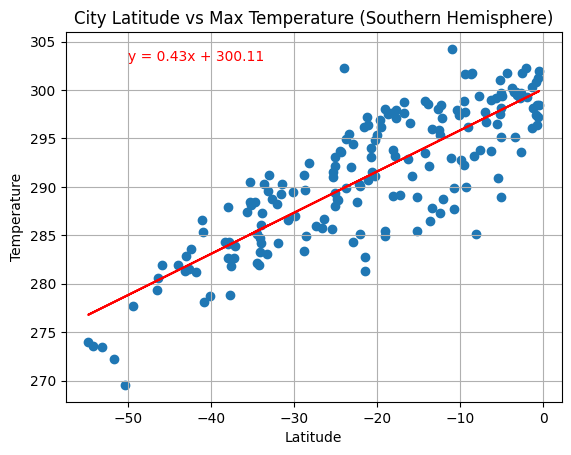

In [85]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50, 303), color = "red")

plt.plot(x_data, regress_values, color = "red")

**Discussion about the linear relationship:** In these plots, the linear regression models the decrease of temperature the farther you get from the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0012171434353079765


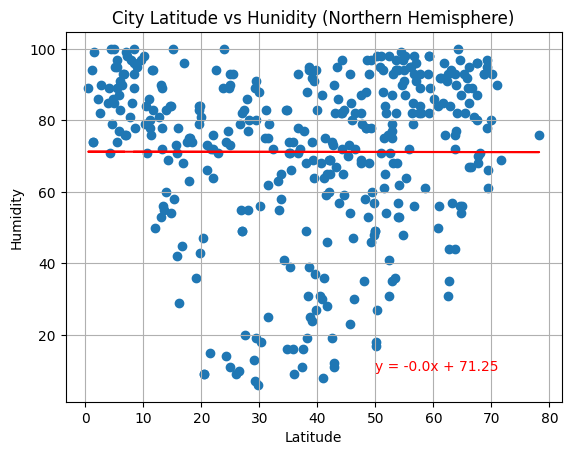

In [86]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Hunidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50, 10), color = "red")

plt.plot(x_data, regress_values, color = "red")

The r-value is: -0.009842653062599268


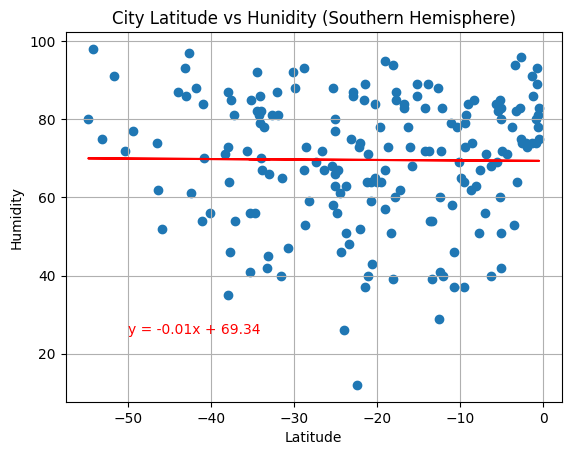

In [87]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Hunidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50, 25), color = "red")

plt.plot(x_data, regress_values, color = "red")

**Discussion about the linear relationship:** In these plot, linear regression shows that humidity is generally uniform at all latitudes

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04010650243368898


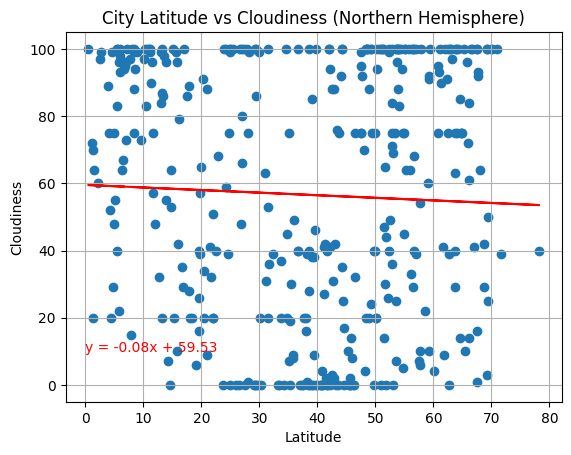

In [89]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0, 10), color = "red")

plt.plot(x_data, regress_values, color = "red")

The r-value is: -0.18922274248361198


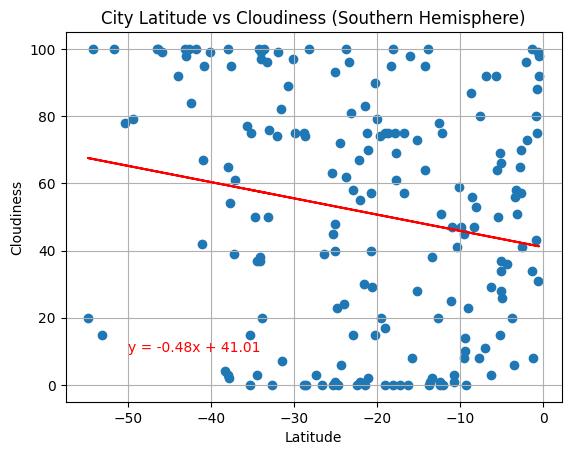

In [90]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50, 10), color = "red")

plt.plot(x_data, regress_values, color = "red")

**Discussion about the linear relationship:** These plots indicate that cloud cover is fairly consistent in the northern hemisphere it decreases as you approach the equator in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1629859021323475


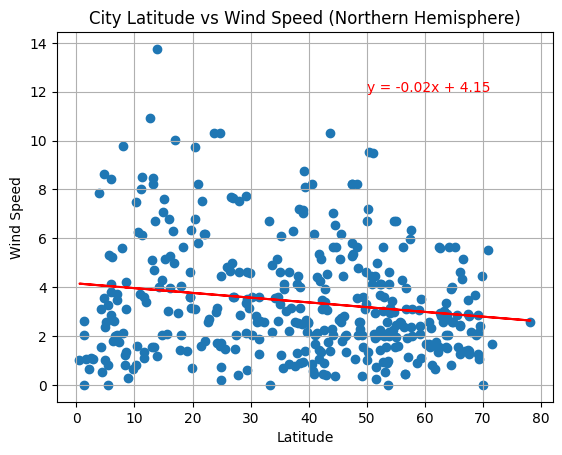

In [91]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (50, 12), color = "red")

plt.plot(x_data, regress_values, color = "red")

The r-value is: -0.19114636434913623


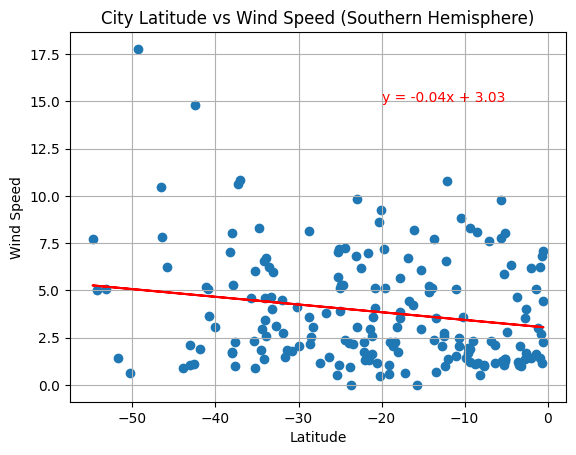

In [92]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

plt.scatter(x_data, y_data)
plt.title("City Latitude vs Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20, 15), color = "red")

plt.plot(x_data, regress_values, color = "red")

**Discussion about the linear relationship:** These plots indicate that wind speed increases as you go south.